House price prediction

In [98]:
# import dependences
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [8]:
# load excel file 
data=pd.read_excel("C:\\Users\\kasuk\\Downloads\\DS - Assignment Part 1 data set.xlsx")

In [9]:
# check the 1st five elements 
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [10]:
# check the shape 
data.shape

(414, 9)

In [65]:
#data['House price of unit area'].values

In [11]:
# check whether data contains any missing values
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [12]:
# now check the correlation(-1 to 1)  b/w input feature to output or we can visualize using plots
data['Transaction date'].corr(data['House price of unit area'])

0.0875292716972599

In [13]:
data['House Age'].corr(data['House price of unit area'])

-0.21056704627721684

In [14]:
data['Distance from nearest Metro station (km)'].corr(data['House price of unit area'])

-0.6736128553689182

In [21]:
data['Number of convenience stores'].corr(data['House price of unit area'])

0.5710049111111485

In [22]:
data['Number of convenience stores'].corr(data['House price of unit area'])

0.5463066525036047

In [23]:
data['latitude'].corr(data['House price of unit area'])

0.5463066525036047

In [26]:
data['longitude'].corr(data['House price of unit area'])

0.523286507028756

In [27]:
data['Number of bedrooms'].corr(data['House price of unit area'])

0.05026478703318893

In [28]:
data['House size (sqft)'].corr(data['House price of unit area'])

0.046489150457136745

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

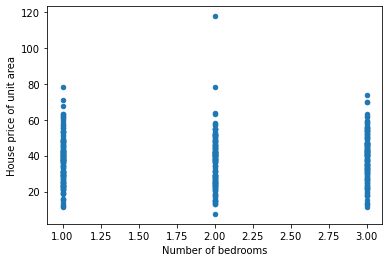

In [20]:
data.plot.scatter(x='Number of bedrooms',y='House price of unit area')

In [35]:
#drop the output feature from the data store in another variable
x=data.drop(columns=['House price of unit area'],axis=1)
y=data['House price of unit area']

In [39]:
# now in x we have input features and in y we have output feature
x.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491


In [40]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [45]:
# split the data into training and testing data using train test split
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.1,random_state=1)

LINEAR REGRESSION

In [47]:
# select the model 
# As the output is continious values we use regression model
model=LinearRegression()

In [48]:
# fit the training data
model.fit(xtrain,ytrain)

LinearRegression()

In [50]:
# predict xtrain
xtrain_predicted=model.predict(xtrain)

In [61]:
# check the score of actual vs predicted
r2_score(xtrain_predicted,ytrain)

0.21895842963480416

In [67]:
# predict xtest(the unseen data)
xtest_predicted=model.predict(xtest)

In [69]:
r2_score(xtest_predicted,ytest)

0.6936277641986274

DECISION TREE

In [81]:
model1=DecisionTreeRegressor()

In [82]:
model1.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [89]:
xtrain_predicted1=model1.predict(xtrain)

In [90]:
r2_score(xtrain_predicted1,ytrain)

1.0

In [92]:
xtest_predicted1=model1.predict(xtest)

In [93]:
r2_score(xtest_predicted1,ytest)

0.6794225517305201

KNN

In [99]:
model2=KNeighborsRegressor()

In [101]:
model2.fit(xtrain,ytrain)

KNeighborsRegressor()

In [104]:
xtrain_predicted3=model2.predict(xtrain)

In [105]:
r2_score(xtrain_predicted3,ytrain)

0.5448990597810919

In [108]:
xtest_predicted3=model2.predict(xtest)

In [109]:
r2_score(xtest_predicted3,ytest)

0.6391739986804179

Conclusion : From the above three models we have concluded that "DecisionTreeRegressor" is perfromed well on train and test data compared to "LinearRegression and "KNN".
     As the data we have given to the models are very less the "LinearRegression" model  unable to learn much from the training data  but performed well on test data. This is called underfitting.By increasing the training data size we can increase the acccuracy of both training and test data.